Here, I have performed data analysis on a public dataset available on Kaggle.
The dataset had the information realted to the product positioning in a store.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go

With the above code the pandas library is being imported. It is popular toolkit used for data analysis purpose.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Using the above code google colab will be able to access the files that are stored in my google drive.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Product Positioning.csv')

The above code imports a csv file to dataframe format and the dataset will be refered to as df.

In [ ]:
df.head()

,Product ID,Product Position,Price,Competitor's Price,Promotion,Foot Traffic,Consumer Demographics,Product Category,Seasonal,Sales Volume
0,185102,Aisle,17.07,16.16,No,Medium,Families,Clothing,No,2823
1,188771,Aisle,17.41,13.13,No,Low,Seniors,Clothing,No,654
2,180176,End-cap,43.16,38.37,Yes,Medium,Young adults,Electronics,Yes,2220
3,112917,Aisle,42.26,38.98,Yes,Low,Families,Clothing,Yes,1568
4,192936,End-cap,47.94,45.59,No,Medium,College students,Clothing,Yes,2942


The head function reads and displays the starting 5 entries of a dataset.
This is being done to get a very surface level understanding of the dataset.

About the dataset ->
This contains dataset realted to the product positioning in a retain environment. It aims to understand the impact of various factors on sales volumne and consumer behaviour.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product ID             1000 non-null   int64  
 1   Product Position       1000 non-null   object 
 2   Price                  1000 non-null   float64
 3   Competitor's Price     1000 non-null   float64
 4   Promotion              1000 non-null   object 
 5   Foot Traffic           1000 non-null   object 
 6   Consumer Demographics  1000 non-null   object 
 7   Product Category       1000 non-null   object 
 8   Seasonal               1000 non-null   object 
 9   Sales Volume           1000 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 78.2+ KB


The above is the Info function, it gives a overall information about our whole dataset.

It contains information such as the total number of entries, the columns and the presense of null values. As well the data type of each columns.

My dataset has a total of 1000 entries.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Product ID,1000.0,154899.86200,25795.563607,110033.00,133164.5000,154694.500,176954.2500,199976.00
Price,1000.0,28.02001,13.067876,5.06,16.9175,28.680,39.3325,49.98
Competitor's Price,1000.0,25.55011,13.156466,0.72,14.2775,26.145,37.1250,49.85
Sales Volume,1000.0,1769.31100,718.386603,507.00,1136.5000,1791.500,2363.7500,2999.00


The describe function generates a descriptive statistics of all the quantitaive columns of a dataset.

The .T is transpose, it works by exchanging the rows and columns. In this situation, I have used it to represent the data in a more presentable manner.

In [ ]:
df.isna().sum()

Product ID               0
Product Position         0
Price                    0
Competitor's Price       0
Promotion                0
Foot Traffic             0
Consumer Demographics    0
Product Category         0
Seasonal                 0
Sales Volume             0
dtype: int64

With the above code, I have just checked if there are any null values in my dataset.
Fortunately, none of the columns contains any null values that need to be handled.

isna() function is used to find if there are any null values in our dataset and sum() function tells the total null values of each columns.

In [ ]:
df["Product Category"].value_counts()

Product Category
Clothing       338
Electronics    336
Food           326
Name: count, dtype: int64

With the above code, I have just identified how many products belongs to each category.

It is seen that there are almost equal products identifying each of the three categories.

In [ ]:
df["Product Position"].value_counts()

Product Position
End-cap           342
Aisle             340
Front of Store    318
Name: count, dtype: int64

With the above code, it should be noted that mainly three different product positioning have been mentioned.

In [ ]:
df["Consumer Demographics"].value_counts()

Consumer Demographics
Families            263
College students    251
Seniors             249
Young adults        237
Name: count, dtype: int64

With the above code, the different consumer demographics within the dataset have been identified.


In [ ]:
df["Foot Traffic"].value_counts()

Foot Traffic
High      340
Medium    338
Low       322
Name: count, dtype: int64

In [ ]:
df["Promotion"].value_counts()

Promotion
No     528
Yes    472
Name: count, dtype: int64

With this above code, we can note that out of the 1000 entries of product -> 528 were not on promotion and 472 were on promotion.

##Note - Below this text are all of the data analysis I have done that will be used frequently in my business questions as to create better answer for the business questions.

These are also some very general but important analysis of the data.

In [ ]:
demographic_sales = df.groupby('Consumer Demographics')['Sales Volume'].sum()
demographic_sales

Consumer Demographics
College students    450063
Families            443276
Seniors             444089
Young adults        431883
Name: Sales Volume, dtype: int64

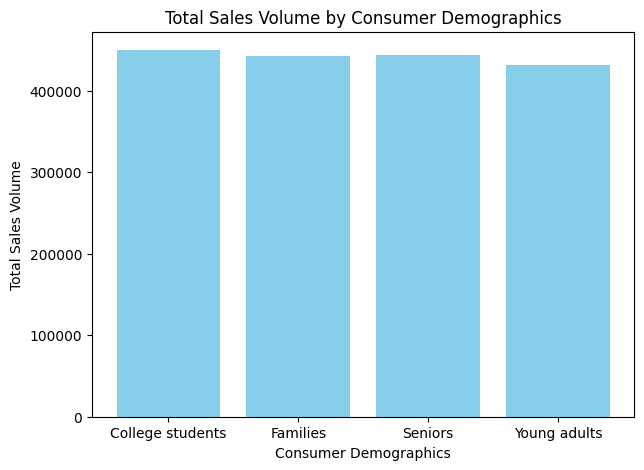

In [ ]:
plt.figure(figsize=(7, 5))
plt.bar(demographic_sales.index, demographic_sales.values, color='skyblue')
plt.xlabel('Consumer Demographics')
plt.ylabel('Total Sales Volume')
plt.title('Total Sales Volume by Consumer Demographics')
plt.show()

In the above two codes, I have identified the total sales volume contribute by each consumer demographics categories.
And, I have also presented those numbers as a bar chart.

Bar chart was used as it a good tool of visualations when drawing comparisons.

**It's cleary visible that all categories have similar sales volume with college students taking the lead in it. With this, I can suggest the company to add more diverse clothes for such age groups as they have more tendency to buy clothes.**

In [ ]:
position_product = df.groupby('Product Position')['Sales Volume'].sum()
position_product

Product Position
Aisle             605470
End-cap           599917
Front of Store    563924
Name: Sales Volume, dtype: int64

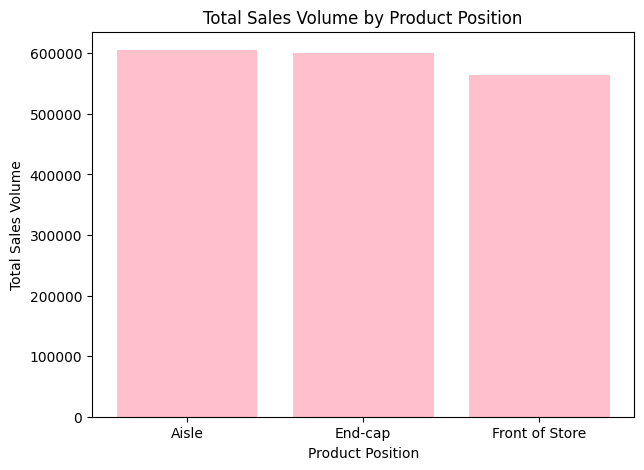

In [ ]:
plt.figure(figsize=(7, 5))
plt.bar(position_product.index, position_product.values, color='pink')
plt.xlabel('Product Position')
plt.ylabel('Total Sales Volume')
plt.title('Total Sales Volume by Product Position')
plt.show()

Here, I have analyzed and visaulised the contribution of the different product position to sales volume.

It can be seen that the front of the store contributes to the least sales, this could be because of many reasons.

In [ ]:
category_product = df.groupby('Product Category')['Sales Volume'].sum()
category_product

Product Category
Clothing       618580
Electronics    587517
Food           563214
Name: Sales Volume, dtype: int64

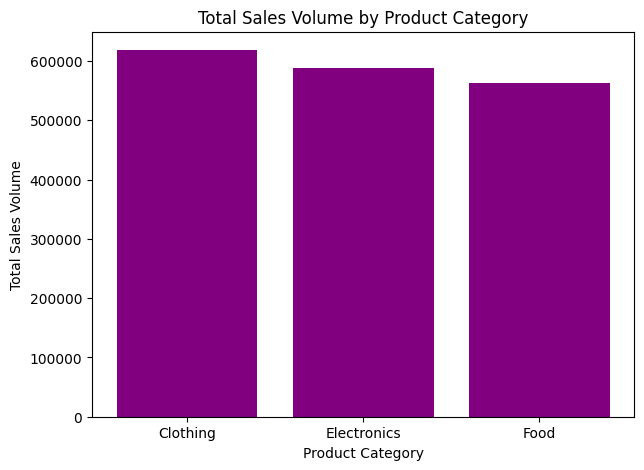

In [ ]:
plt.figure(figsize=(7, 5))
plt.bar(category_product.index, category_product.values, color='purple')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Volume')
plt.title('Total Sales Volume by Product Category')
plt.show()

With the above code, we have analysed that out of all the product categories - clothing contributes the most to sales volume and food the least.

In [ ]:
promotion_sales = df.groupby('Promotion')['Sales Volume'].sum()
promotion_sales

Promotion
No     929927
Yes    839384
Name: Sales Volume, dtype: int64

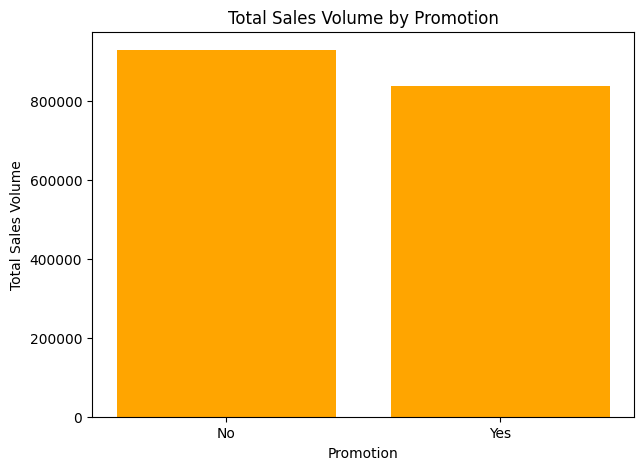

In [ ]:
plt.figure(figsize=(7, 5))
plt.bar(promotion_sales.index, promotion_sales.values, color='orange')
plt.xlabel('Promotion')
plt.ylabel('Total Sales Volume')
plt.title('Total Sales Volume by Promotion')
plt.show()

Above code is used to show which products contribute more to sales, the ones which were under promotion or the ones that were not under promotion.

This will be used in next section, to evaluate which all products should be kept under promotion to promote furthur.

**It can be analyzed that Families category ha received the highest foot traffic, meanwhile Young adults have received the least foot traffic.**

In [ ]:
ab = df.groupby('Product Position')['Price'].sum()
ab

Product Position
Aisle             9491.29
End-cap           9802.03
Front of Store    8726.69
Name: Price, dtype: float64

In [ ]:
average_price_by_position = df.groupby('Product Position')['Price'].mean()
print(average_price_by_position)

Product Position
Aisle             27.915559
End-cap           28.660906
Front of Store    27.442421
Name: Price, dtype: float64


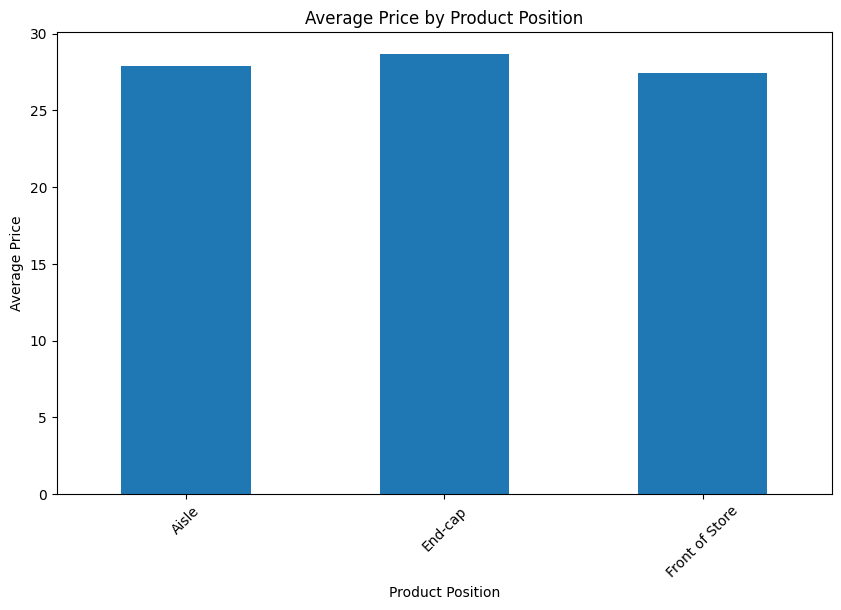

In [ ]:
average_price_by_position.plot(kind='bar', figsize=(10, 6))
plt.title('Average Price by Product Position')
plt.xlabel('Product Position')
plt.ylabel('Average Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# BUSINESS QUESTIONS



Q1) What is the average price of each product category ?

In [ ]:
average_price_by_category = df.groupby('Product Category')['Price'].mean()
print(average_price_by_category)

Product Category
Clothing       27.750000
Electronics    27.851101
Food           28.474049
Name: Price, dtype: float64


About the code -

I have used the group by function to evaluate the price of different individual categories. And, with the mean function it gives the average of those prices.

It can be seen that the price of food on average is the highest.

Also, we have observed in data exploration that the sales volumne of the food category is the least, followed by electronics and then clothing which has highest contribution to the sales.

Next, in this question, I will be comparing the average price difference between our competitor's and our pricing.

In [ ]:
company_food_prices = df[df['Product Category'] == 'Food']['Price'].mean()
competitor_food_prices = df[df['Product Category'] == 'Food']["Competitor's Price"].mean()
print(company_food_prices)
print(competitor_food_prices)

28.474049079754604
25.940613496932514


About the code -

Here, by using df['Product Category'] == 'Food' - I am able to retrive the average price of just one particular category.

For both, competitor and company's price.

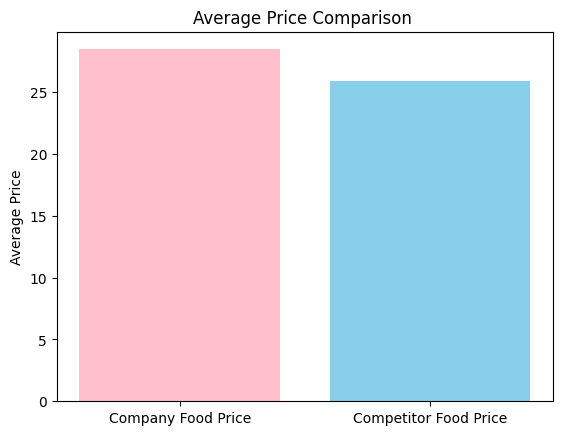

In [ ]:
plt.bar(['Company Food Price', 'Competitor Food Price'], [company_food_prices, competitor_food_prices], color=['pink', 'skyblue'])
plt.title('Average Price Comparison ')
plt.ylabel('Average Price')
plt.show()

About the code -
- plt.bar code - I have allocated names for each bar. and have allocated colors for each of them also.
- plt.title - is used to give title to the graph
- plt.ylabel - it gives label to the y axis
- plt.show - enables the user to see the graph

With the above output, I would say that the price of food category of our company on an average is much higher than that of our competitors. And, that is being reflected on the sales contribution made by the category as well.

The prices of this particular category must be looked into.

Q2) Which product positing generates the highest sales under each product categories?

In [ ]:
position_product = df.groupby('Product Position')['Sales Volume'].sum()
position_product

Product Position
Aisle             605470
End-cap           599917
Front of Store    563924
Name: Sales Volume, dtype: int64

About the code -

I have used groupby function to get to know the total sales volume of all diferent product position. And then further used the sum function to summarize it.

This code gives a whole summation of how much sales are produced under different product position.

In [ ]:
position_category_sales = df.groupby(['Product Position', 'Product Category'])['Sales Volume'].sum()
position_category_sales

Product Position  Product Category
Aisle             Clothing            205272
                  Electronics         208371
                  Food                191827
End-cap           Clothing            215166
                  Electronics         205724
                  Food                179027
Front of Store    Clothing            198142
                  Electronics         173422
                  Food                192360
Name: Sales Volume, dtype: int64

About the code -

In this case, i have used three columns under groupby as I wanted to show the sum of of different positions of different product categories.

The above code furthur classifies the sales produced by each category with respect to their product position.

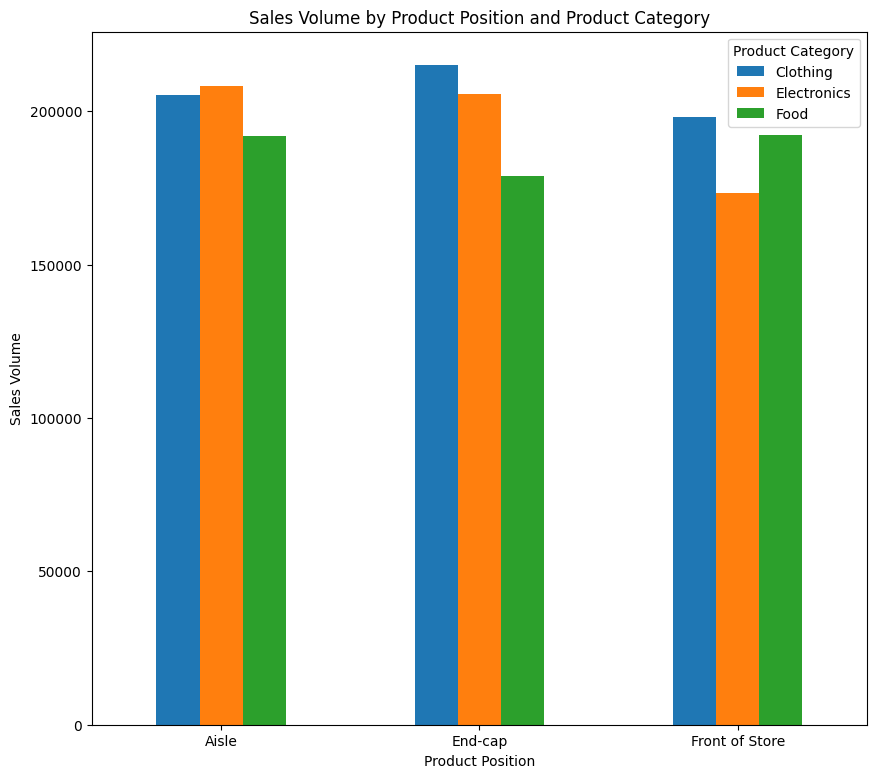

In [ ]:
position_category_sales_plot = position_category_sales.unstack()

position_category_sales_plot.plot(kind='bar', figsize=(10, 9))
plt.title('Sales Volume by Product Position and Product Category')
plt.xlabel('Product Position')
plt.ylabel('Sales Volume')
plt.xticks(rotation=360)
plt.legend(title='Product Category')
plt.show()

About the code -

For visualisation I have here used grouped bar charts. With the unstack() function, I have unstacked the original outcome of product_category_sales as it will be presentable.

- Further i have assigned kind as bar, which creates a bar chart of width = 10 and height = 9.
- plt.xticks(rotation=360) - rotates the title under x-axis such as aisle, end-cap, front of store.
- The code legend title is used to add title to the small table at the top of the graph.

I have used grouped bar chart to visualize the sales volume of each product category under each product position. Grouped bar chart has helped to easily visualize and present it in an understanable manner.

- Aisle has created the largest sales volume, under which electronics have done very well.
- Under End-cap, clothing has create the largest sales volume.
- Under front of the store, again clothing has done well.

With this, I would like to advise the business to position different product category product in positions they are more favoured in.
1. Electronics are sold the most in Aisle.
2. Clothing are sold more at the end-cap.
3. Food is sold more at the Aisle.

With this, more products should be placed accordingly.

In regards of the front of the store, electronics and clothing has been sold on a similar level. Neverthless, all three categories should be kept in the front of the store to attract the customers.

Q3) Which category of consumer demographics contrubited more to which particular product category ?

In [ ]:
questionthree = df.groupby(['Consumer Demographics', 'Product Category'])['Sales Volume'].sum()
questionthree

Consumer Demographics  Product Category
College students       Clothing            174828
                       Electronics         135410
                       Food                139825
Families               Clothing            169568
                       Electronics         135220
                       Food                138488
Seniors                Clothing            124201
                       Electronics         161576
                       Food                158312
Young adults           Clothing            149983
                       Electronics         155311
                       Food                126589
Name: Sales Volume, dtype: int64

About the code -

In this case, i have used three columns under groupby as I wanted to show the sum of of different demographics of different product categories.

Above we can identify the sales contribution of each demographics under each product category.

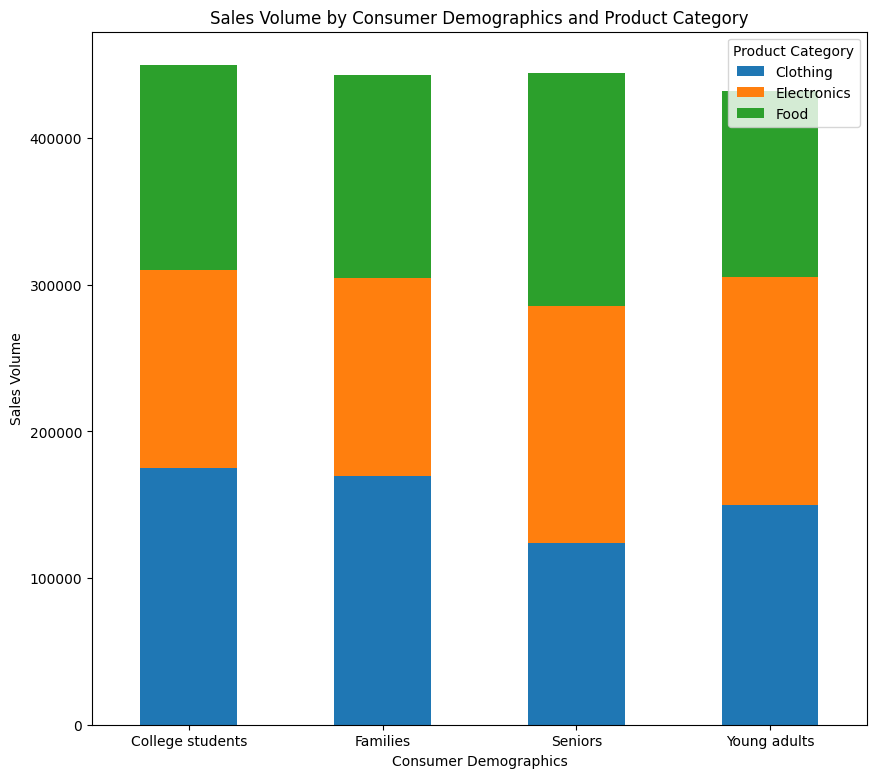

In [ ]:
questionthree_plot = questionthree.unstack()

questionthree_plot.plot(kind='bar', stacked = True, figsize=(10, 9))
plt.title('Sales Volume by Consumer Demographics and Product Category')
plt.xlabel('Consumer Demographics')
plt.ylabel('Sales Volume')
plt.xticks(rotation=360)
plt.legend(title='Product Category')
plt.show()

About the code -

For visualisation I have here used grouped bar charts. With the unstack() function, I have unstacked the original outcome of questionthree as it will be more presentable.

- Further i have assigned kind as bar, which creates a bar chart of width = 10 and height = 9 and with stacked being set to true, the charts are stacked.
- plt.xticks(rotation=360) - rotates the title under x-axis.
- The code legend title is used to add title to the small table at the top of the graph.

Observations -
- College Students contribute the most in the clothing section, and least in the electronics.
- Families contribute the most in the clothing section, and the least in the electronics.
- Seniors spend the most on electronics and the least in clothing.
- Young adults spend the most in electronics and least in food.

Here are some of my suggestion based on the above observations:
- The reason for college students to not contribute in electronics could be that they do not have enough money. So, promote student discounts - which especifically helps such students.

- It can be seen that seniors do not buy clothing, so the company can focus it's on producing clothes for categories that are contributing more. And as for senior can try bringing in more old people friendly electronics and food to promote sales.

- For young adults, the purchase of electronics is quite high. With this, they can promote even more trendy tech savy products as their focus gets shifted to the new technology.

- And it should be noted, that the food contribution is less in all the categories. The company needs to evaluate the prices and work on it to increase the sales.



Q4) What is the relationship between foot traffic and other columns ? Is it of any significant to the business ?

In [ ]:
questionfour = df.groupby('Foot Traffic')['Price'].mean()
print(questionfour)

Foot Traffic
High      28.203912
Low       28.605186
Medium    27.277544
Name: Price, dtype: float64


About the code -

I have used the group by function to evaluate the foot traffic and the average prices under different foot traffic.


In [ ]:
questionfour_p2 = df.groupby('Foot Traffic')['Sales Volume'].mean()
print(questionfour_p2)

Foot Traffic
High      1759.311765
Low       1803.767081
Medium    1746.544379
Name: Sales Volume, dtype: float64


So here are few observations that I have made -

- The average prices of products under high foot traffic is high. Meanwhile, the average sales do not correspond to it as it is not particulary high.
- The average prices of products under low foot traffic is the highest. But here given its position and price - the sales volume makes sense. And, it is the highest among all.
- The average prices of products under medium foot traffic is the lowest. But, the sales volume is almost as equal to that of the higest foot traffic.

Technically, high foot traffic should have the highest sales but because of those products having high prices - the contribution is not significant. Such products should we re-positioned or prices should be set low to attract more sales. High Traffic is the area that could be improved furthur to enhance sales.

The low tarffic area has the highest prices products and is producing the highest average sales, this in my opinion a good startegy.

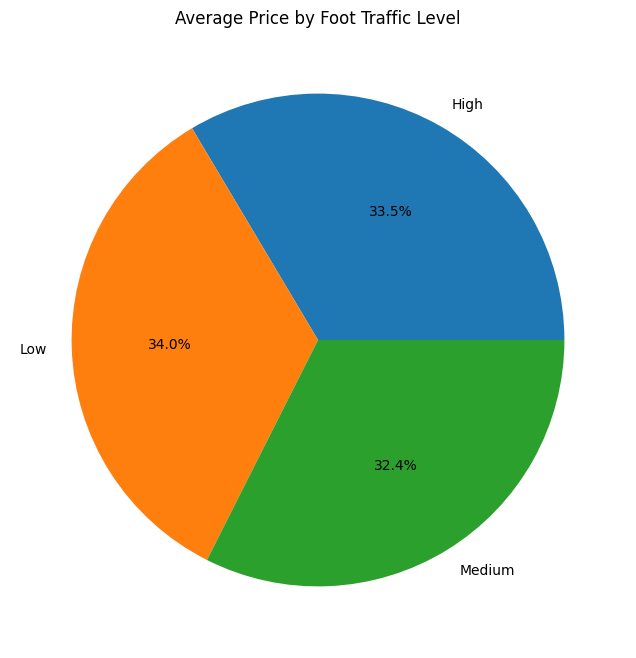

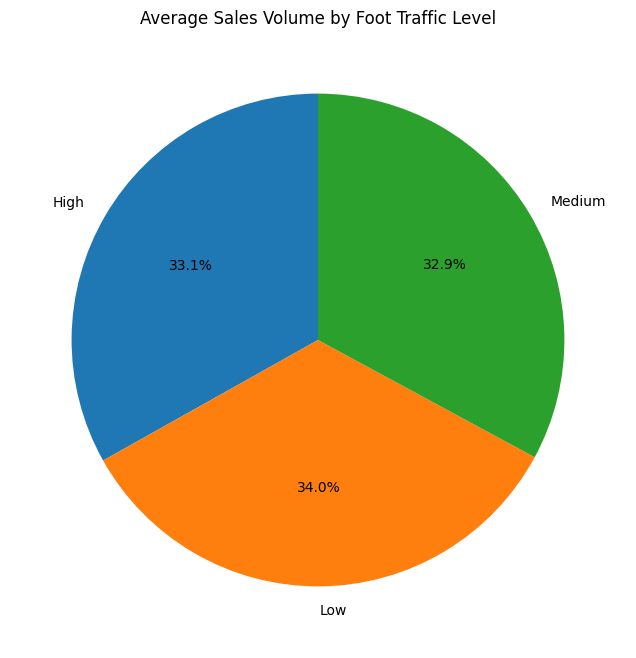

In [ ]:
questionfour.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Average Price by Foot Traffic Level')
plt.ylabel('')
plt.show()

questionfour_p2.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=90)
plt.title('Average Sales Volume by Foot Traffic Level')
plt.ylabel('')
plt.show()

About the code -

Here the type of chart I have used is pie (kind = pie) whose figure size is 8 width and 8 length. And with autopct='%1.1f%%' - I have converted the figures into percentage for better and more understanable visuals.

By default the ylable is being printed as prices, which does not look presentable so by adding plt.ylabel('')  - I have coded it as there should be no heading for that particular label.

startangle=90 is used determin the starting angle of the pie chart. It is used for better visualisations

Here, I have presented two pie charts showing the percentage of average prices of products and sales volume under each foot traffic category.

Q5) Which products should be kept for promotion in future ?

In [ ]:
product_promotion_sales = df.groupby(['Product Category', 'Promotion'])['Sales Volume'].sum()
product_promotion_sales

Product Category  Promotion
Clothing          No           351390
                  Yes          267190
Electronics       No           296803
                  Yes          290714
Food              No           281734
                  Yes          281480
Name: Sales Volume, dtype: int64

About the code -

Group by is used to get a stacked view of different categories and there sales performance under there promotion status.


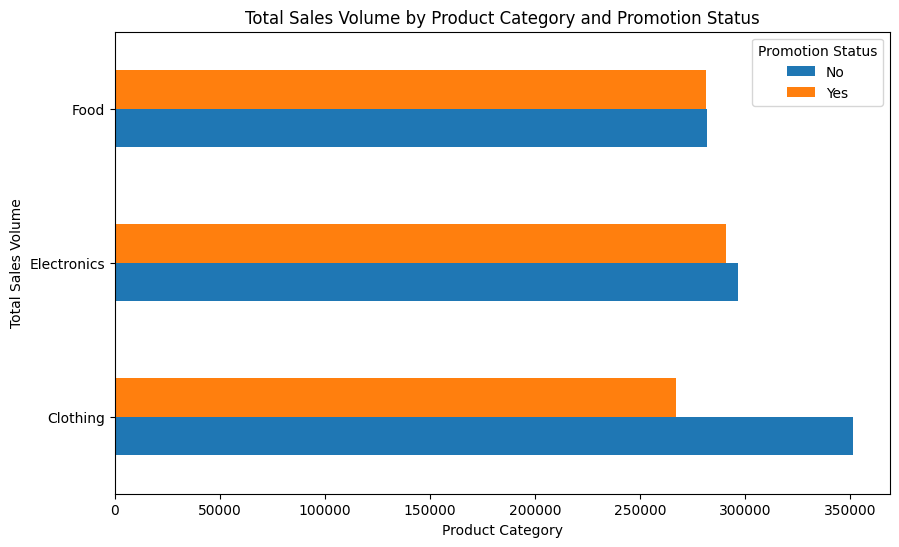

In [ ]:
product_promotion_sales_plot = product_promotion_sales.unstack()

product_promotion_sales_plot.plot(kind='barh', figsize=(10, 6))

plt.title('Total Sales Volume by Product Category and Promotion Status')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Volume')
plt.xticks(rotation=360)
plt.legend(title='Promotion Status')

plt.show()

About the code -

First I have unstacked the output form the first code to create better visualisation.

Then here, I have used horizontal bar charts to see a better version of comparison.

Here are the observations -

- The sales volume of products under promotion for food, has a very similar sales volume.
- The sales volume of products under promotion for electonics is lower then that of which are not under sale.
- The sales volume of products under promotion for clothing is very low then that of which are not under sale.

Since, the prices of food is in genera high in the company. They can promote them even more to create higher income.

And promotion of electronics will also help in increasing the sales.

In case of clothing, they are performing quite well as it is and should be continued as such.

Q6) What the prices of products that has more sales volume ? Is there a trend around it?

In [ ]:
max = df['Price'].max()
print("Maximum Price:", max)

Maximum Price: 49.98


About the code -

I have used the max funtion to get ther maximum value under the Price column.

Here, the maximum price that a product carries is 49.98 dollar.

In [ ]:
min = df['Price'].min()
print("Minimum Price:", min)

Minimum Price: 5.06


About the code -

I have used the min function here to get the minimum value under the price column.



Here, the minimum price that a product carries is 5.06 dollar.

With this, we can say that all of the product ranges between 5 to 50 dollars.

On the basis of that, I have divided the prices into low prices and high prices in the the next code. I have taken the mid value as 25 and divided on the basis of that.

In [ ]:
high_prices = df[df["Price"] >= 25]

low_prices = df[df["Price"] < 25 ]

print(high_prices)
print(low_prices)

     Product ID Product Position  Price  Competitor's Price Promotion  \
2        180176          End-cap  43.16               38.37       Yes   
3        112917            Aisle  42.26               38.98       Yes   
4        192936          End-cap  47.94               45.59        No   
5        117590          End-cap  34.50               34.34        No   
6        189118   Front of Store  41.11               40.15       Yes   
..          ...              ...    ...                 ...       ...   
990      180566            Aisle  33.32               32.90       Yes   
991      124273          End-cap  44.99               44.48       Yes   
992      159902            Aisle  34.75               31.60        No   
993      163182            Aisle  43.05               41.66        No   
996      146858   Front of Store  47.72               46.78        No   

    Foot Traffic Consumer Demographics Product Category Seasonal  Sales Volume  
2         Medium          Young adults    

About the code -

Here, the df["Price"] selectes the price column from our defined dataset. and >= 25 sets the criteria to select all the values that are more than or equal to 25 and put them in a variable called low_prices.

And the same has been done for high_prices.

Here, I have created two seperate classes that will be storing values of different types of prices. This will help in furthur analysis.

In [ ]:
low_prices['Sales Volume'].sum()

753911

In [ ]:
high_prices['Sales Volume'].sum()

1015400

About the code -

In the above two codes I have taken the sum of sales volume under each prices categories that I have made

Here, it can be seen that the low prices prodcuts have contributed more to the sales then the high prices ones.

In [ ]:
low_prices.value_counts()

Product ID  Product Position  Price  Competitor's Price  Promotion  Foot Traffic  Consumer Demographics  Product Category  Seasonal  Sales Volume
110295      End-cap           13.10  8.47                Yes        Low           Young adults           Electronics       No        1448            1
170937      Front of Store    16.58  15.92               No         Low           Young adults           Food              No        507             1
172517      Aisle             23.94  19.70               No         Medium        Seniors                Electronics       Yes       808             1
172364      Aisle             12.30  10.30               Yes        High          College students       Clothing          No        2931            1
172344      End-cap           15.42  13.77               Yes        Medium        Families               Clothing          Yes       2030            1
                                                                                                   

In [ ]:
high_prices.value_counts()

Product ID  Product Position  Price  Competitor's Price  Promotion  Foot Traffic  Consumer Demographics  Product Category  Seasonal  Sales Volume
110033      Front of Store    40.15  39.38               Yes        Low           Families               Electronics       Yes       1998            1
167981      End-cap           37.40  37.29               No         High          College students       Clothing          No        730             1
166728      Aisle             25.92  23.68               Yes        High          College students       Electronics       No        542             1
167218      End-cap           35.35  34.40               No         Low           College students       Clothing          No        2621            1
167351      Aisle             33.05  31.73               No         Low           College students       Electronics       No        961             1
                                                                                                   

From the above two codes, we can conclude that total product under low prices are 433 and total products under high prices are 567.

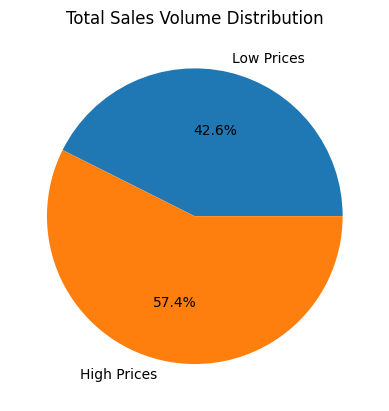

In [ ]:
labels = ['Low Prices', 'High Prices']
sizes = [low_prices['Sales Volume'].sum(), high_prices['Sales Volume'].sum()]

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Total Sales Volume Distribution')
plt.show()

In the above code I have created a pie chart reprersenting the contribution of different price category.

With the above analysis, we can see that most of the products are under high prices category and they are the ones that have contributed more to the sales volume by a lot.

This indicated that the consumer are buying products that has a pricing more than 25 dollars a lot.

With this, the company can think about including even more products belonging to such categories as they are accepted by the consumers.

Q7) Which product category should have more seasonal products?

In [ ]:
questionseven = df.groupby(['Product Category', 'Seasonal']).size().unstack()
questionseven

Seasonal,No,Yes
Product Category,,
Clothing,160,178
Electronics,182,154
Food,153,173


About the code -

I have used groupby to show the unstacked values of Product Category and if they are seasonal product or no. Groupby naturally creates an stacked version, which is then have to be unstacked for visualization


In the above code, I have calculated the total number of products under each product category that are seasonal or not seasonal.

In [ ]:
heatmap_questionseven = go.Heatmap(
    z=questionseven.values,
    x=questionseven.columns,
    y=questionseven.index,
    colorscale='viridis',
)

layout = go.Layout(
    title='Relation between Product Category and Seasonal',
    xaxis=dict(title='Seasonal'),
    yaxis=dict(title='Product Category'),
    coloraxis_colorbar=dict(title='Frequency')
)

fig = go.Figure(data=[heatmap_questionseven], layout=layout)

fig.show()

About the code -

Here, I have used an interactive heatmap. (Values can be seen by hovering over the plots)

go.heatmap() - is the code to create heatmap using plotly
- The z values counts the frequency of seasonal and plot it to the map
- The x values is to display along the x axis of the map, which here are the yes seasonal or no seasonal.
- The y values is to display along the y axis of the map, it displays all different product categories.
- Color = virdis is the predefines color scheme under heatmaps in plotly.

Golayout is a function under plotly that is used to define the visual look of the graph.

Then the other codes are used to set the title of all there respective axis. The meaning of dict (dictinory) function is used to create a dictionary specifying various properties of their respective axis.

The last two lines of codes are used to create the figure with the set layout and then show it.


In the above graph, here are some of my observations -

- In food, the frequency of seasonal is more which is 173 and the non seasonal are 153.
- In electronics, the frequency of seasonal is less which is 154 and the non seasonal are 182.
- In clothing, the frequency of seasonal is more which is 178 and the non seasonal are 160.

The pattern that is that electronics are more non seasonal, which makes sense as there are not many gadgets that sells in regard to the season except air conditioning and heater.

In clothing, the frequency of seasonal is pretty high. This is because the demand of such category changes accordingly. Not just seasons, but presense of festivals also increases such demand.

For food, there are also in many ways very seasonal. Mangoes are highly known for summers and fruits such as grapes are winter fruits. Also, turkey and pumpkins are sold more on thanksgiving and halloween respectively.

My advise is to have more seasonal products under clothing as they have the most potential. Followed by food and lastly electronics.


In [ ]:
salescheck = df.groupby(['Product Category', 'Seasonal'])['Sales Volume'].sum()
salescheck

Product Category  Seasonal
Clothing          No          295140
                  Yes         323440
Electronics       No          314315
                  Yes         273202
Food              No          256455
                  Yes         306759
Name: Sales Volume, dtype: int64

The above code furthur clarifies that the potential that seasonal clothes hold is high, as the sales volume is 323440. Adding even more diverse items will only help the business furthur.

The sales of electronics is higher in non seasonal products, this proves that it does not have much potential but seasonal products such as Ac and heater must not be ignored.

Lastly, the sales of seasonal food is much higher then that of non seasonal food.

Q8) Analyze the foot traffic of different consumer demographics.

In [ ]:
contingency_table = pd.crosstab(df['Consumer Demographics'], df['Foot Traffic'])
contingency_table

Foot Traffic,High,Low,Medium
Consumer Demographics,,,
College students,77,88,86
Families,95,83,85
Seniors,89,77,83
Young adults,79,74,84


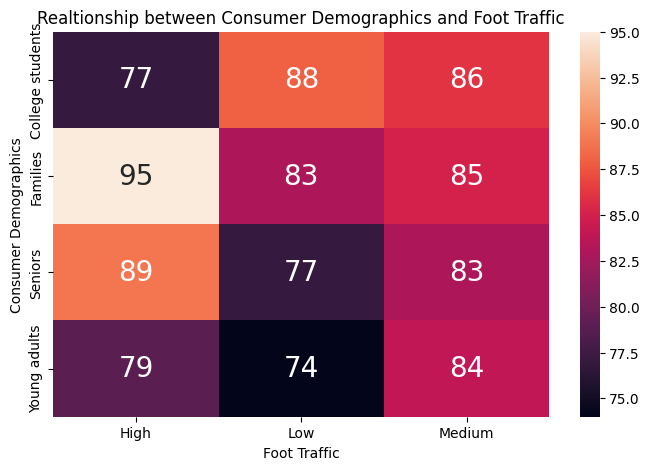

In [ ]:
#visualsing the contigency table of consumer demographics and foot traffic as a heatmap

plt.figure(figsize=(8, 5))
sns.heatmap(contingency_table , annot = True, annot_kws={"size": 20})
plt.title('Realtionship between Consumer Demographics and Foot Traffic')
plt.xlabel('Foot Traffic')
plt.ylabel('Consumer Demographics')
plt.show()

About the code -

In the above two codes, I have imported used seaborn which has been imported as sns.

Contigency table is used to draw comparison between two different columns. Here, I wanted to analyze foot traffic in each category of consumer demographics which means I needed to show the realtionship between two qualitative columns.

pd.crosstab [cross tabulation] is the function used to perform the create contigency table.

Afterwards, I have used heatmap as the visualisation tool as it is popular when showing two-dimensional data.


---
About the heatmap ->
figsize depecits the size of it, 8 being the width and 5 being the height.

annot = True stands for annotaion, which is by default false. With it being true, the numbers of traffic are being shown inside each box.

It can be analyzed that Families category ha received the highest foot traffic, meanwhile Young adults have received the least foot traffic.

In [ ]:
salescheck2 = df.groupby(['Consumer Demographics'])['Sales Volume'].sum()
salescheck2

Consumer Demographics
College students    450063
Families            443276
Seniors             444089
Young adults        431883
Name: Sales Volume, dtype: int64

<Axes: ylabel='Consumer Demographics'>

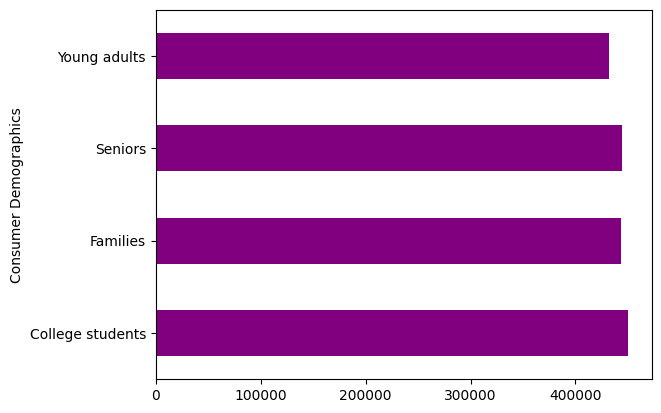

In [ ]:
salescheck2.plot(kind = "barh", color = "Purple")

Here it can be witnessed that -
- Young Adults have the lowest foot traffic and even have the least sales volume. For this, the products for them must be promoted even better.
- Even though the families have the most foot traffic, but they do not have the most sales volume.
- The most sales are by college students, this shows their tendency to just buy products instead of exploring.

This also shows that young adults do not have an immense amount of money to spend, and they choose to spend it on electronics. And also, do not have high traffic in the store as well.



##Final Discussion and Conclusion

A final discussion and conclusion. For example, what are the overall strengths and lim- itations of your explanatory data analysis? What are the insights and implications of
2
the results for the business? What are your data-driven recommendations for your client company?

Overall Strenghts - My explanatory data analysis has been able to cover all of the columns that are there in the dataset provided. This ensures that I have been able to analysis the data in many possible ways.

Limitations - One of the limitations is that not being able to explore all the relationship between all the columns. With many columns, comes many realtions that can be formed and evaluated. I have done my best to highlight the importance of many of them.


Insights and Implications -
1. Clothing in general has the most potential and the most sales.
2. Food has the least sales and are very highly rated, compared to the competitor's price as well.
3. Clothing and Food are highly seasonal.
4. Electronics are non seasonal products and are highly preferd by young adults and seniors.
5. A product being in the front of the store, does not mean that it is sold well.
6. Aisle is the best product position in context to there sales volume.

These are some of the many things that I have observed from the analysis.

Following are some of my data driven recommendations -
1. Introduce more seasonal clothes and food.
2. Provide student discount to college students under electronics, to promote sales of electonics to them.
3. More age friendly electonics must be in stock for the seniors.
4. Since the high prices are doing well, more products under that category must be added in the store.
5. In the future, food needs more promotion as well as the prices must be lowered as they are fairly high compared to the competitors and have a visual effect on the sales volume.

The above mentioned are some of the many data driven reccomendations that I have found out from the analysis.